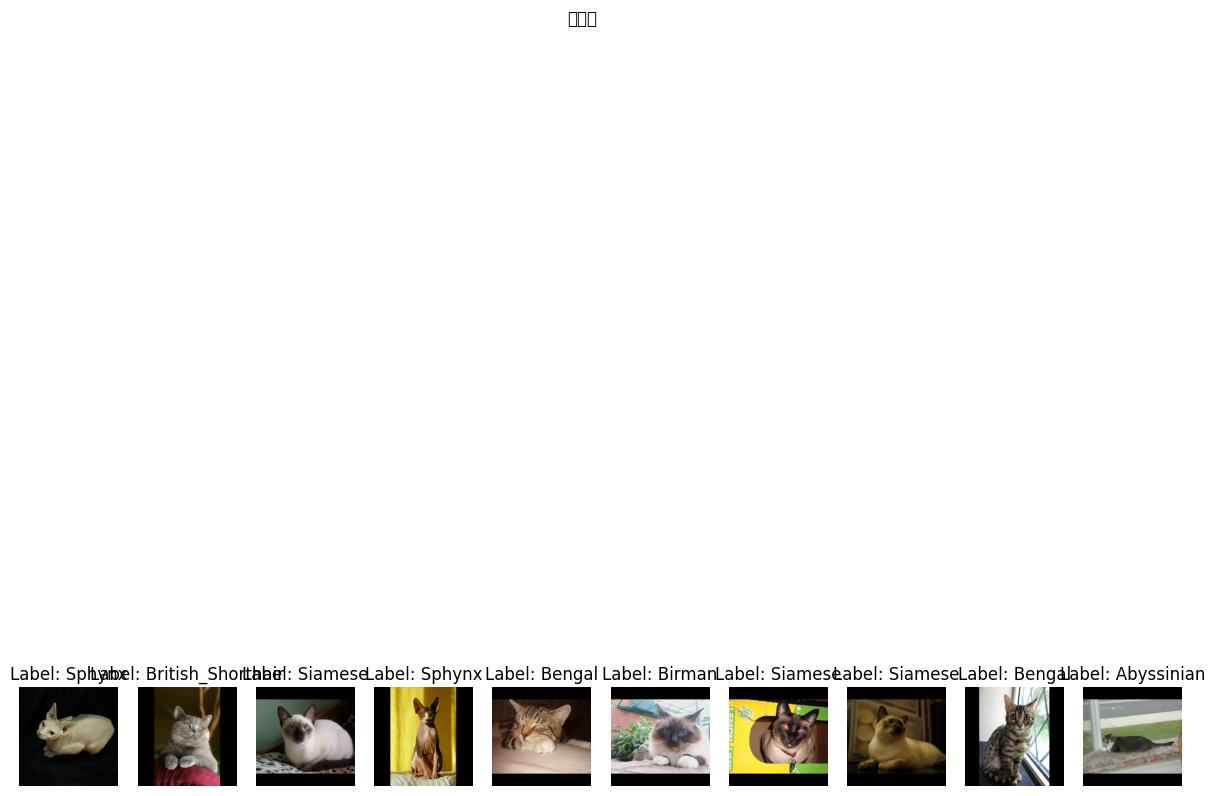

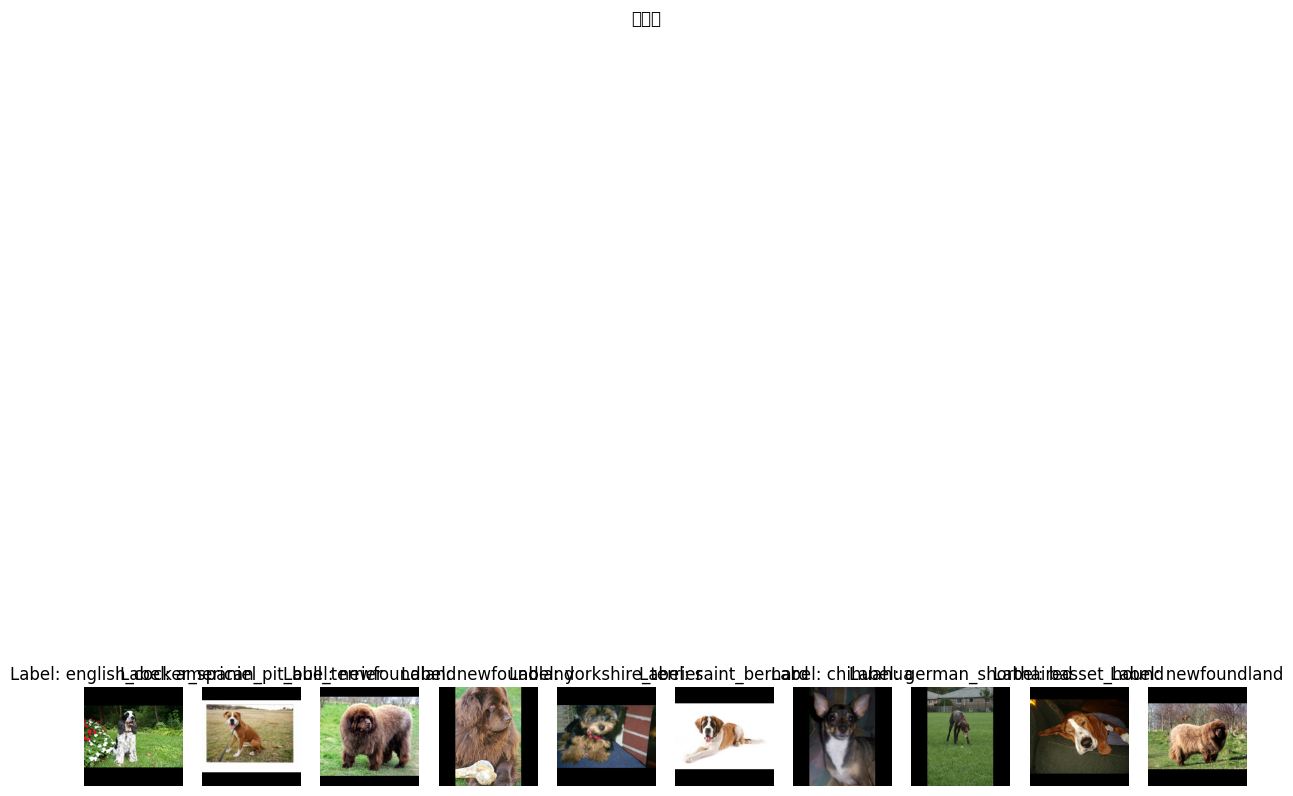

In [107]:
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

cats = [
    "Abyssinian",
    "Bengal",
    "Birman",
    "Bombay",
    "British_Shorthair",
    "Egyptian_Mau",
    "Maine_Coon",
    "Persian",
    "Ragdoll",
    "Russian_Blue",
    "Siamese",
    "Sphynx"
]

labels = info.features['label']

def is_cat(label):
    return labels.int2str(label) in cats

def tf_is_cat(label):
    return tf.py_function(is_cat, [label], tf.bool)

def preprocess_with_padding(image, label):
    IMG_SIZE = 224
    original_shape = tf.shape(image)[:2]
    scale = tf.cast(IMG_SIZE / tf.reduce_max(original_shape), tf.float32)
    new_shape = tf.cast(scale * tf.cast(original_shape, tf.float32), tf.int32)
    image = tf.image.resize(image, new_shape)
    padded_image = tf.image.pad_to_bounding_box(image,
                                                (IMG_SIZE - new_shape[0]) // 2,
                                                (IMG_SIZE - new_shape[1]) // 2,
                                                IMG_SIZE, IMG_SIZE)
    padded_image = tf.cast(padded_image, tf.float32) / 255.0
    return padded_image, label

import matplotlib.pyplot as plt

def display_samples(dataset, num_samples, title):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f'Label: {labels.int2str(label.numpy())}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# 전처리 적용
train_dataset = train_dataset.map(preprocess_with_padding, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_with_padding, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# 고양이와 강아지로 데이터셋 분리
cat_train_dataset = train_dataset.filter(lambda image, label: tf_is_cat(label))
dog_train_dataset = train_dataset.filter(lambda image, label: tf.logical_not(tf_is_cat(label)))
cat_test_dataset = test_dataset.filter(lambda image, label: tf_is_cat(label))
dog_test_dataset = test_dataset.filter(lambda image, label: tf.logical_not(tf_is_cat(label)))

# 고양이와 강아지 샘플 시각화
display_samples(cat_train_dataset, 10, '고양이')
display_samples(dog_train_dataset, 10, '강아지')


In [79]:
vars(labels)

{}

In [83]:
import tensorflow as tf
import tensorflow_datasets as tfds


dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [77]:
train_dataset

<_ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [61]:
vars(info.features['species'])

{'_doc': Documentation(desc='', value_range=''),
 '_shape': (),
 '_dtype': numpy.int64,
 '_serialized_dtype': numpy.int64,
 '_serialized_shape': (),
 '_encoding': <Encoding.NONE: 'none'>,
 '_encoded_to_bytes': False,
 '_dynamic_shape': False,
 '_minimum': None,
 '_maximum': None,
 '_optional': False,
 '_num_classes': 2,
 '_str2int': {'Cat': 0, 'Dog': 1},
 '_int2str': ['Cat', 'Dog'],
 'np_dtype': numpy.int64,
 'tf_dtype': tf.int64}

In [81]:
vars(info.features['label'])

{'_doc': Documentation(desc='', value_range=''),
 '_shape': (),
 '_dtype': numpy.int64,
 '_serialized_dtype': numpy.int64,
 '_serialized_shape': (),
 '_encoding': <Encoding.NONE: 'none'>,
 '_encoded_to_bytes': False,
 '_dynamic_shape': False,
 '_minimum': None,
 '_maximum': None,
 '_optional': False,
 '_num_classes': 37,
 '_str2int': {'Abyssinian': 0,
  'american_bulldog': 1,
  'american_pit_bull_terrier': 2,
  'basset_hound': 3,
  'beagle': 4,
  'Bengal': 5,
  'Birman': 6,
  'Bombay': 7,
  'boxer': 8,
  'British_Shorthair': 9,
  'chihuahua': 10,
  'Egyptian_Mau': 11,
  'english_cocker_spaniel': 12,
  'english_setter': 13,
  'german_shorthaired': 14,
  'great_pyrenees': 15,
  'havanese': 16,
  'japanese_chin': 17,
  'keeshond': 18,
  'leonberger': 19,
  'Maine_Coon': 20,
  'miniature_pinscher': 21,
  'newfoundland': 22,
  'Persian': 23,
  'pomeranian': 24,
  'pug': 25,
  'Ragdoll': 26,
  'Russian_Blue': 27,
  'saint_bernard': 28,
  'samoyed': 29,
  'scottish_terrier': 30,
  'shiba_inu'

In [95]:
labels = info.features['label']

In [88]:
print(train_dataset.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [93]:
cats = [
    "Abyssinian",
    "Bengal",
    "Birman",
    "Bombay",
    "British_Shorthair",
    "Egyptian_Mau",
    "Maine_Coon",
    "Persian",
    "Ragdoll",
    "Russian_Blue",
    "Siamese",
    "Sphynx"
]

In [98]:
labels.int2str(4) in cats

False